In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"E:\coding\CSV\diamonds.csv"
df = pd.read_csv(path)

#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.rename(columns={"x": "length(mm)", "y": "width(mm)", "z": "depth(mm)"}, inplace=True)
df.drop(columns=("Unnamed: 0"), inplace=True)
df

,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.dtypes

carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
length(mm)    float64
width(mm)     float64
depth(mm)     float64
dtype: object

In [5]:
df["cut"].value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

<Axes: xlabel='cut', ylabel='price'>

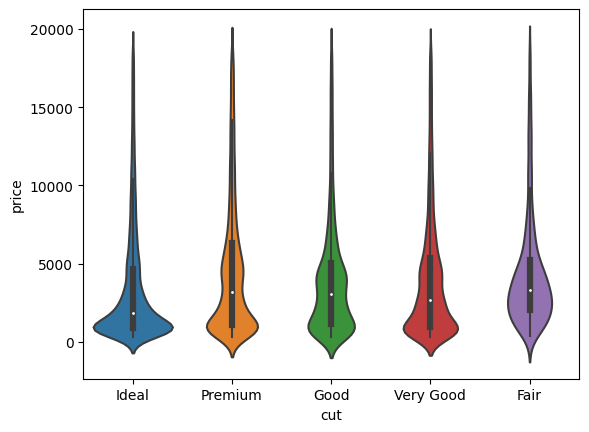

In [6]:
sns.violinplot( x = "cut",y = "price", data=df)

<Axes: xlabel='cut', ylabel='quantity'>

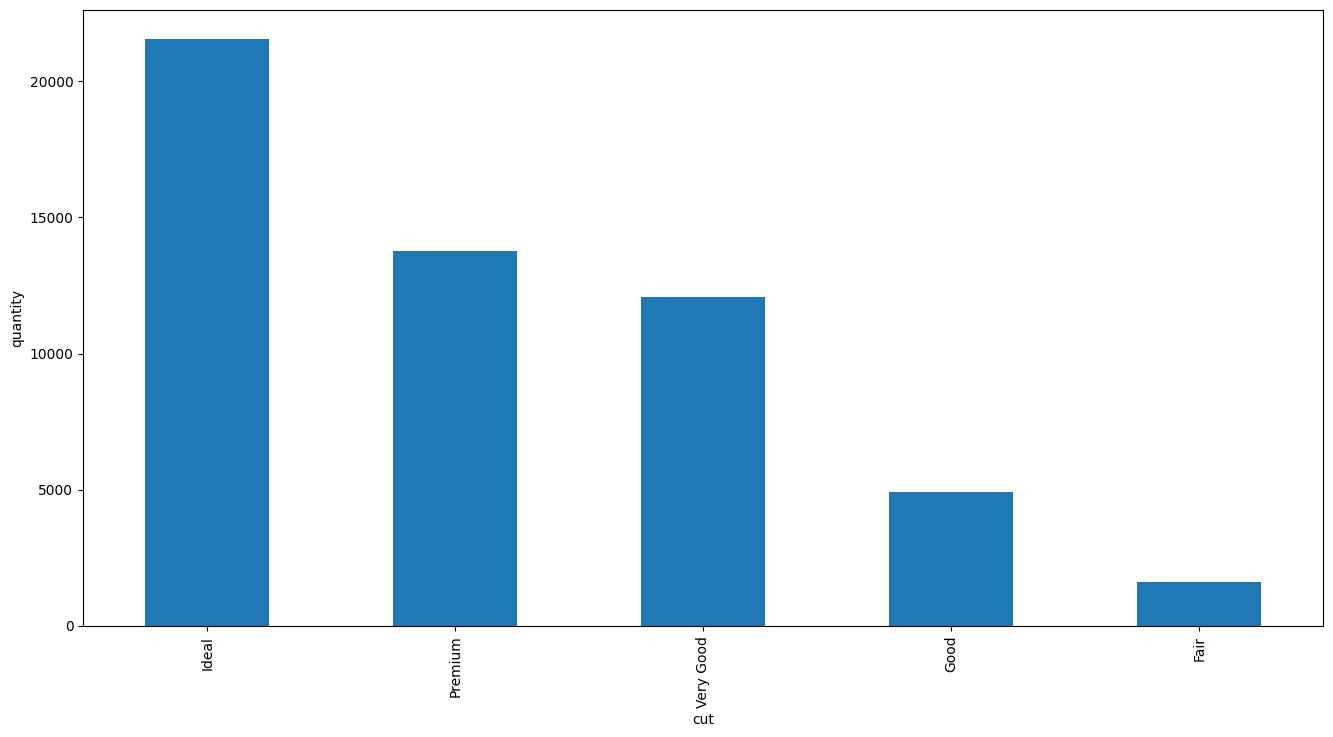

In [7]:
df["cut"].value_counts().plot(kind="bar", xlabel = "cut", ylabel = "quantity",  figsize=(16,8))

In [8]:
df["color"].value_counts()

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

<Axes: xlabel='color', ylabel='price'>

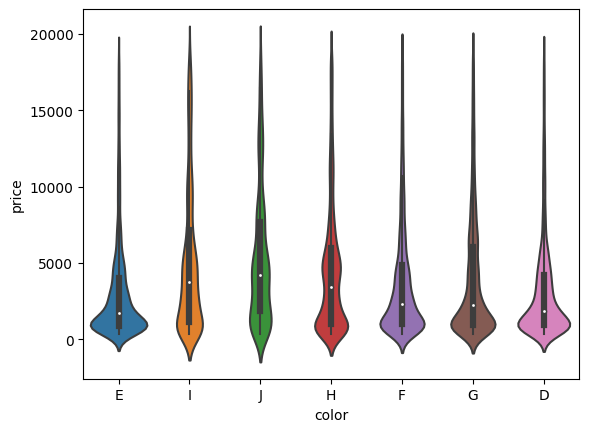

In [9]:
sns.violinplot( x = "color",y = "price", data=df)

<Axes: xlabel='color', ylabel='quantity'>

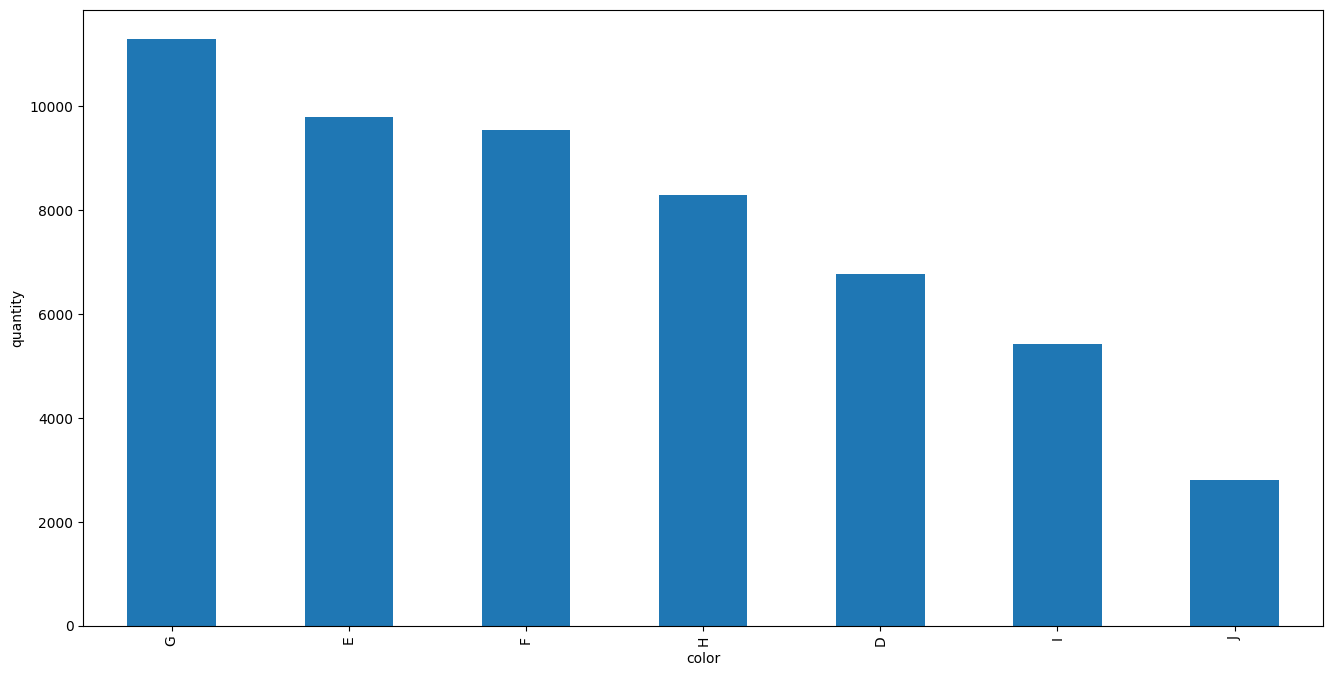

In [10]:
df["color"].value_counts().plot(kind="bar", xlabel = "color", ylabel = "quantity",  figsize=(16,8))

In [11]:
df["clarity"].value_counts()

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

<Axes: xlabel='clarity', ylabel='quantity'>

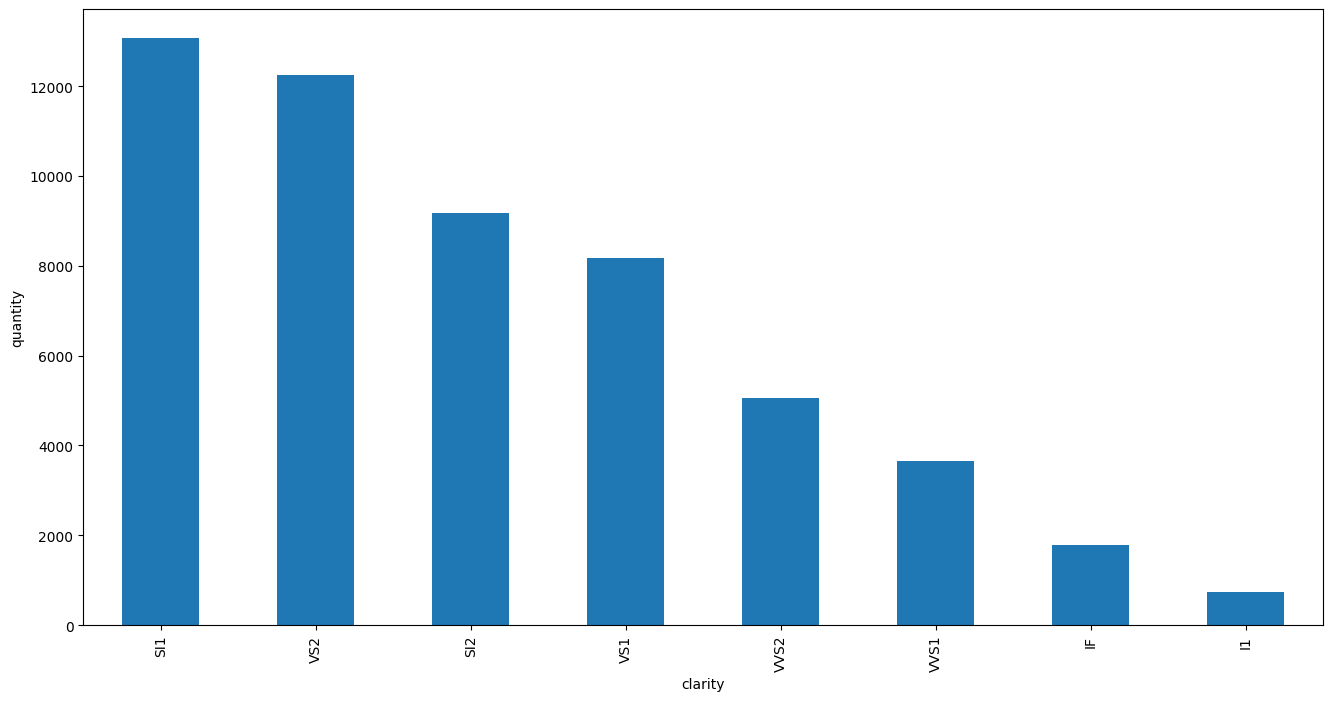

In [12]:
df["clarity"].value_counts().plot(kind="bar", xlabel = "clarity", ylabel = "quantity",  figsize=(16,8))

<Axes: xlabel='clarity', ylabel='price'>

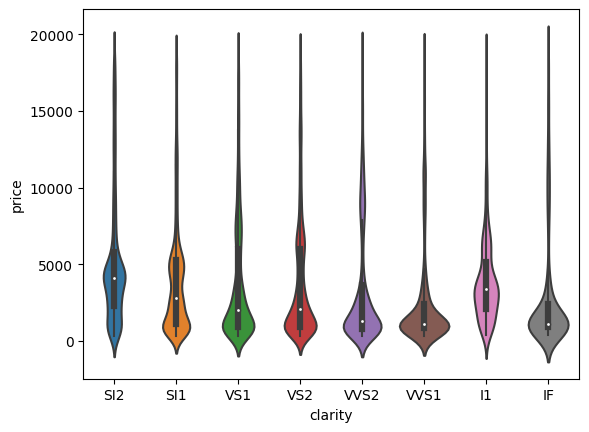

In [13]:
sns.violinplot( x = "clarity",y = "price", data=df)

## method to convert object column to integers column

In [14]:
obj = (df.dtypes == "object")
obj_cols = obj[obj].index

obj_cols

Index(['cut', 'color', 'clarity'], dtype='object')

### method 1

In [15]:
# df["cut"] = pd.factorize(df.cut)[0]
# df

### method 2

In [16]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# label_encoder = LabelEncoder()

# df["clarity"] = label_encoder.fit_transform(df.clarity)
# df


In [17]:
# for col in obj_cols:
#     df[col] = label_encoder.fit_transform(df[col])

# df.head()

In [18]:
df["cut"].value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [19]:
df["cut"] = df.cut.replace({"Premium":1, "Ideal":2, "Very Good": 3, "Good": 4, "Fair": 5})
df

,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm)
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
df["clarity"].value_counts()

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

In [21]:
df['clarity'] = df.clarity.replace({"I1": 8, "SI2": 7, "SI1": 6, "VS2": 5, "VS1": 4, "VVS2": 3, "VVS1": 2, "IF": 1})    # from worst to best
df

,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm)
0,0.23,2,E,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,J,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,D,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,D,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,H,7,61.0,58.0,2757,6.15,6.12,3.74


In [22]:
df["color"].value_counts()

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [23]:
df["color"] = df.color.replace({"D": 1, "E": 2,"F": 3, "G": 4, "H": 5, "I": 6, "J": 7})
df

,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm)
0,0.23,2,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,1,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,1,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,5,7,61.0,58.0,2757,6.15,6.12,3.74


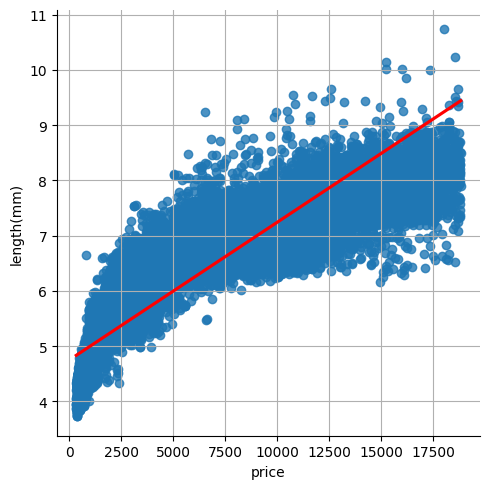

In [24]:
import seaborn as sns

sns.lmplot(x="price", y="length(mm)",data=df, line_kws={'color': 'red'})
plt.grid()

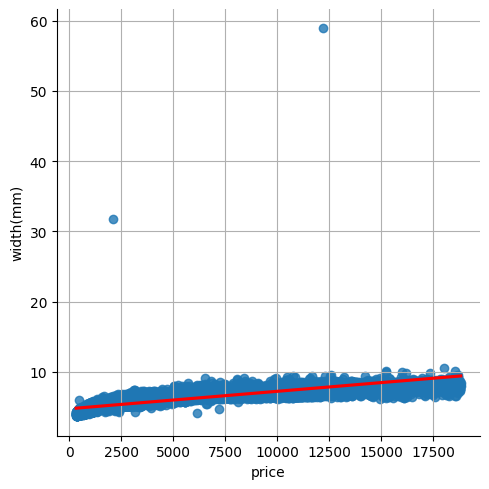

In [25]:
sns.lmplot(x="price", y="width(mm)",data=df, line_kws={'color': 'red'})
plt.grid()

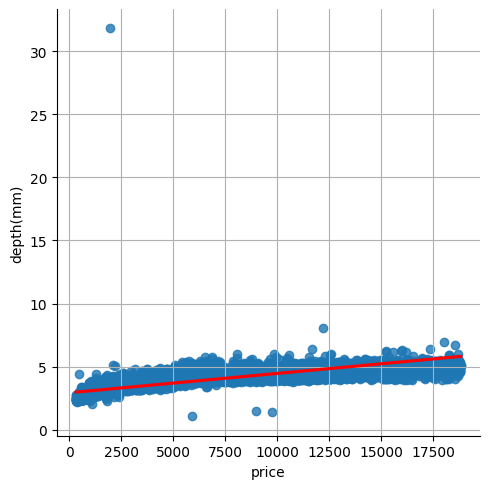

In [26]:
sns.lmplot(x="price", y="depth(mm)",data=df, line_kws={'color': 'red'})
plt.grid()

In [27]:
df.shape

(53920, 10)

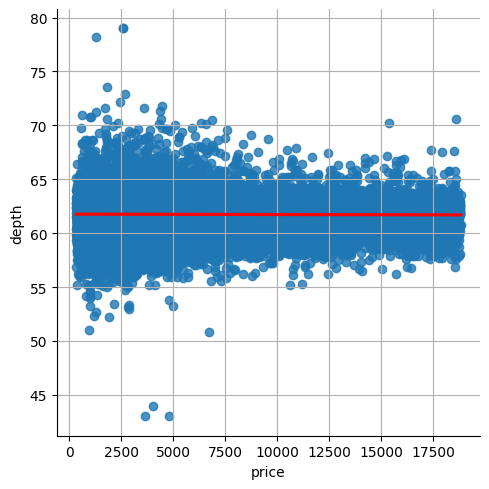

In [28]:
sns.lmplot(x="price", y="depth",data=df, line_kws={'color': 'red'})
plt.grid()

In [29]:
#  removing outlier values in depth  
df = df[(df["depth"] < 75) & (df["depth"] > 50)]

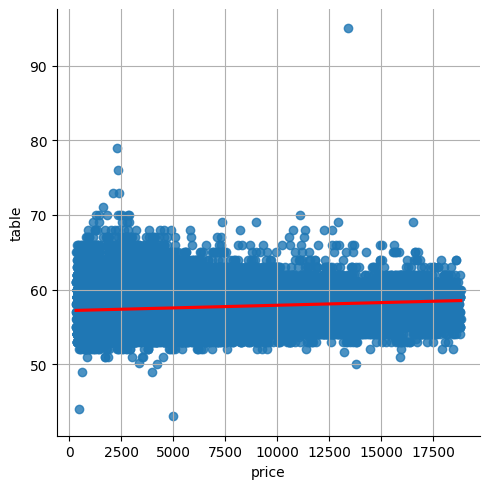

In [30]:
sns.lmplot(x="price", y="table",data=df, line_kws={'color': 'red'})
plt.grid()

In [31]:
#  removing outlier values in table  
df = df[(df["depth"] < 80)]

In [32]:
# there are outliers in the price VS width and price VS depth

df = df[(df["width(mm)"]<15)]
df = df[(df["depth(mm)"]<10)]
df.shape

(53911, 10)

In [33]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'length(mm)', 'width(mm)', 'depth(mm)'],
      dtype='object')

In [34]:
features = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table','length(mm)', 'width(mm)', 'depth(mm)']]
target = df[["price"]]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=5)

print(X_train.shape)
print(X_test.shape)

(36120, 9)
(17791, 9)


In [36]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
regressor.score(X_test, y_test)

0.9072603565633661

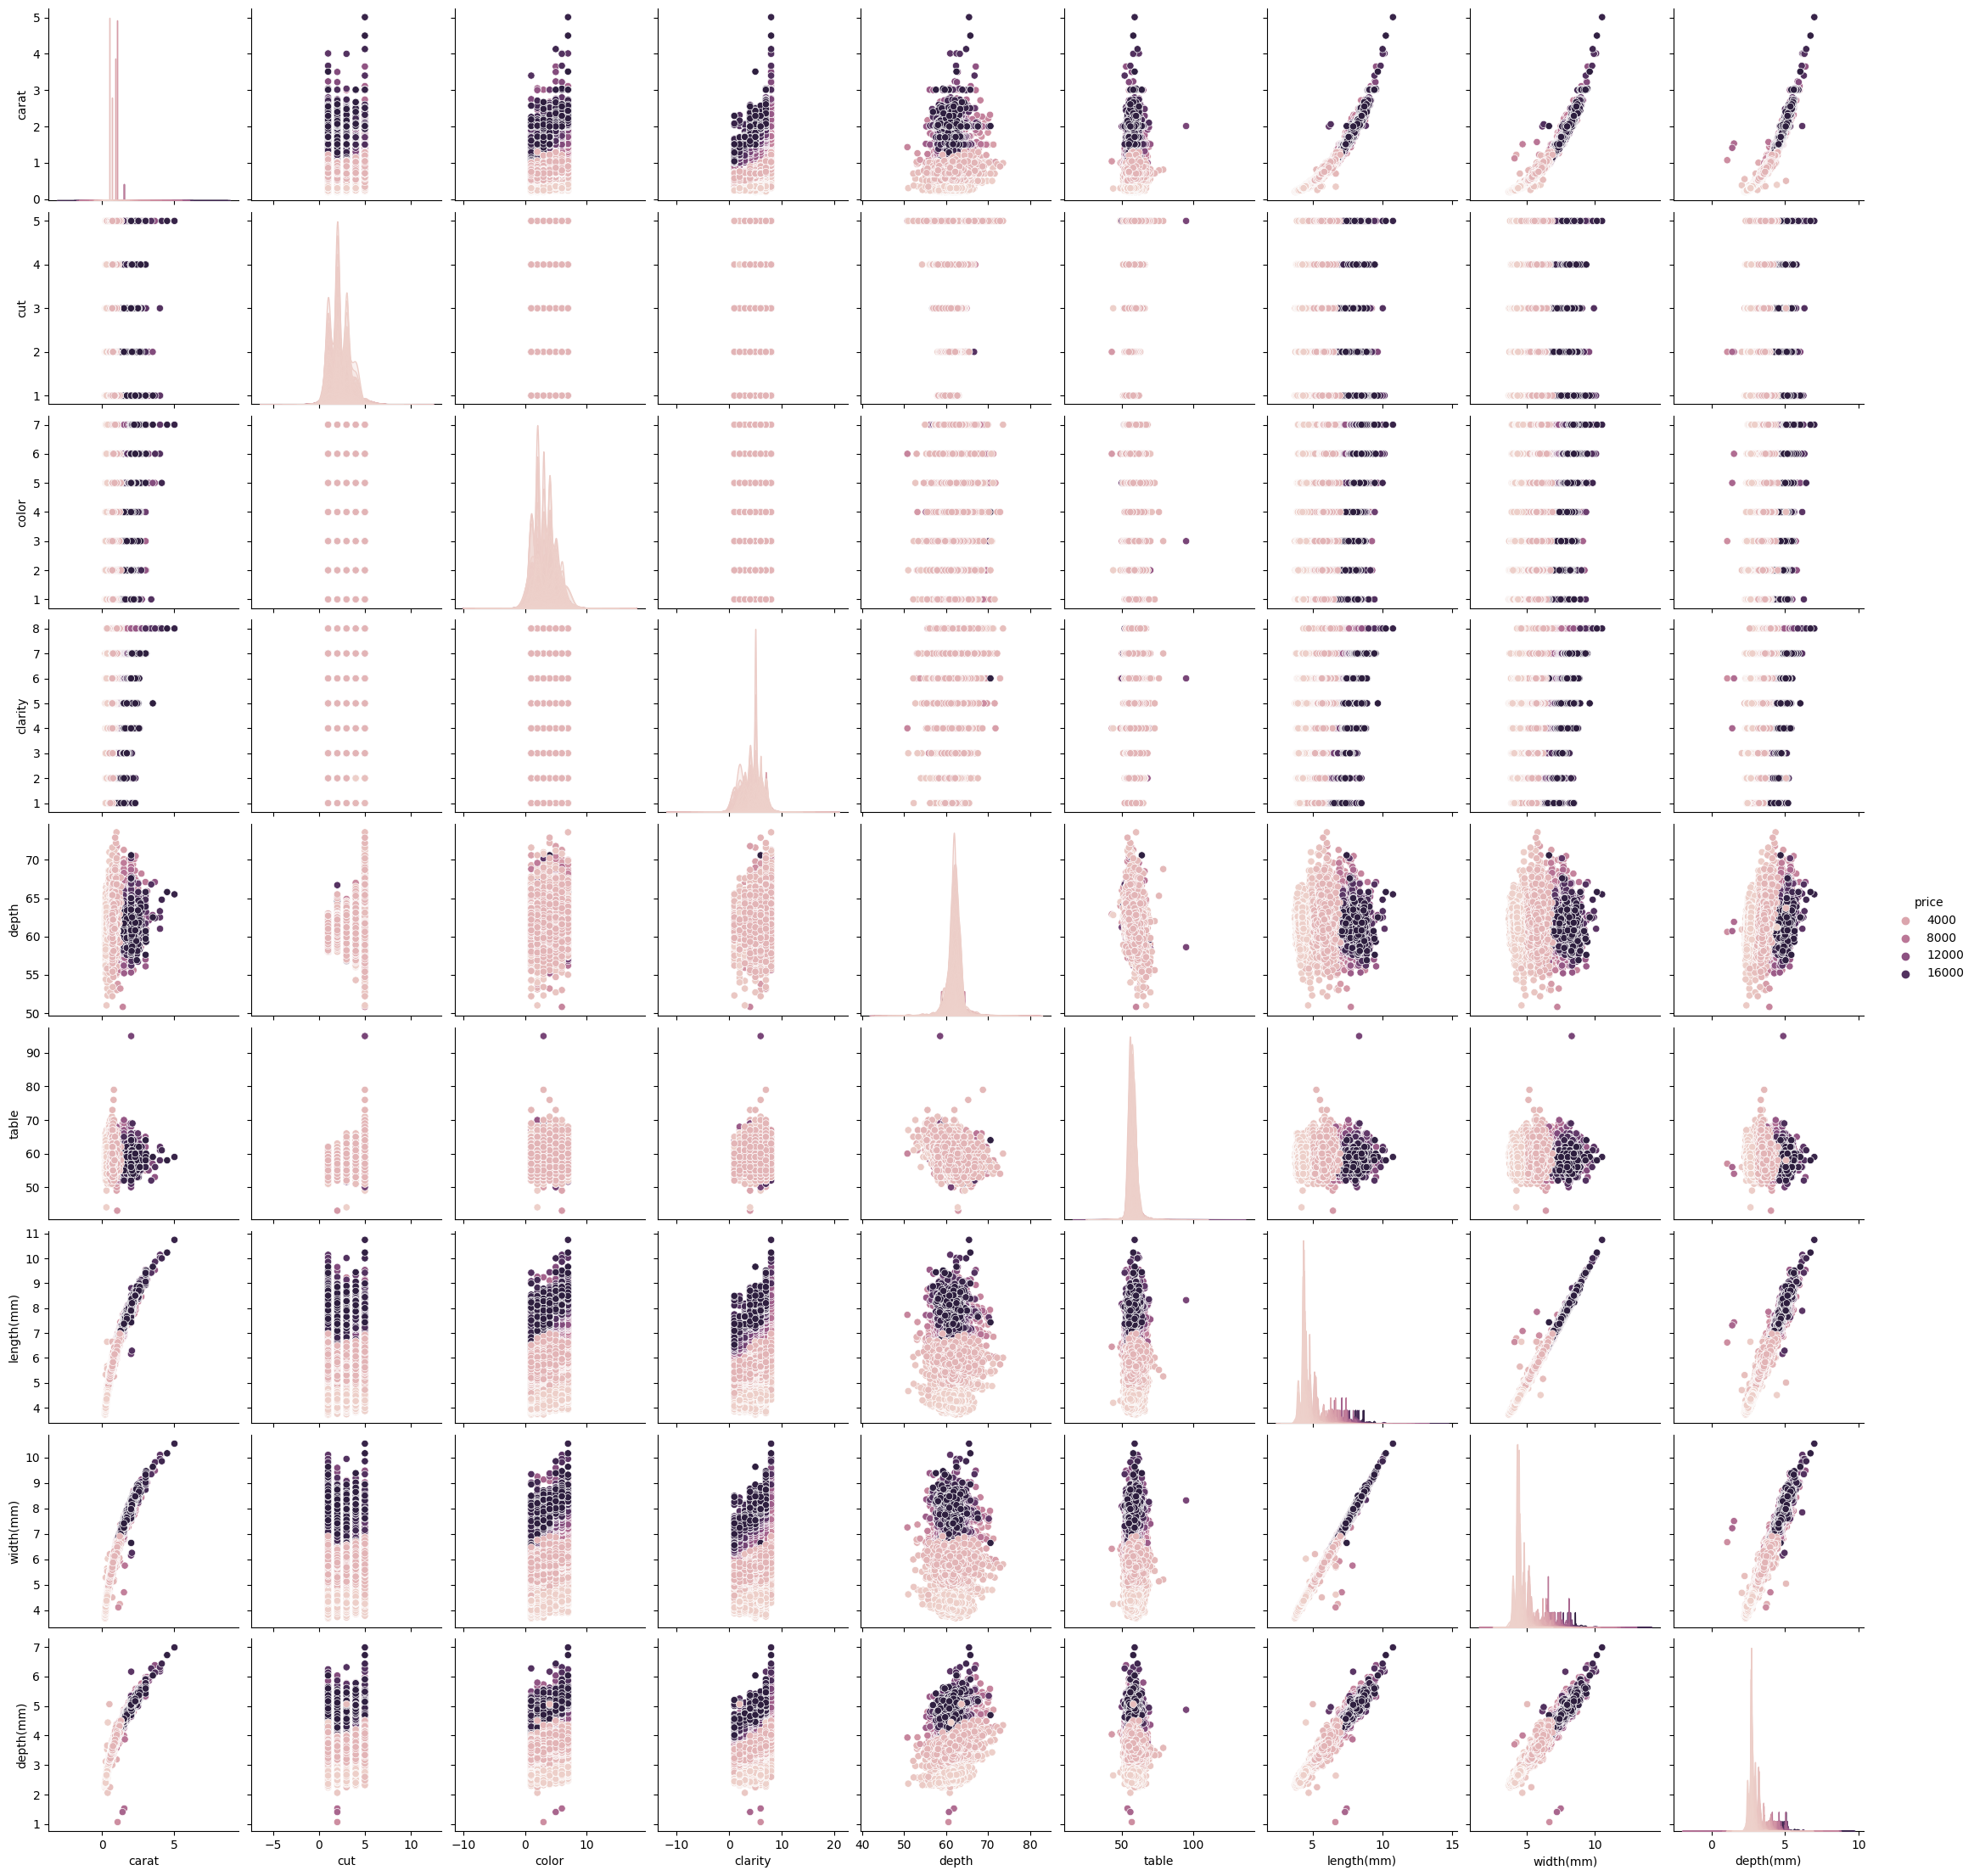

In [38]:
sns.pairplot(df, hue='price')